In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
accept = pd.read_csv('./rawData/accepted_2007_to_2018Q4.csv')

/home/dantole/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
accept.columns[[0,19,49,59,118,129,130,131,134,135,136,139,145,146,147]]

Index(['id', 'desc', 'next_pymnt_d', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'hardship_type', 'hardship_reason',
       'hardship_status', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_loan_status',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [12]:
# id is worth fixing
def find_weird(x):
    try:
        _ = int(x)
        return(True)
    except:
        return(False)

accept = accept[accept['id'].apply(find_weird)]
accept['id'] = accept['id'].apply(int)
accept['id'].dtype

dtype('int64')

In [4]:
pd.options.display.max_rows = 155

In [70]:
na_accept = (accept.isna().sum()/accept.shape[0]*100).round(3).sort_values(ascending=False)

In [45]:
(accept['grade'].value_counts()/accept.shape[0]*100).round(3)

B    29.352
C    28.754
A    19.155
D    14.351
E     6.000
F     1.849
G     0.538
Name: grade, dtype: float64

In [49]:
(accept['loan_status'].value_counts()/accept.shape[0]*100).round(3)

Fully Paid                                             47.629
Current                                                38.852
Charged Off                                            11.879
Late (31-120 days)                                      0.950
In Grace Period                                         0.373
Late (16-30 days)                                       0.192
Does not meet the credit policy. Status:Fully Paid      0.088
Does not meet the credit policy. Status:Charged Off     0.034
Default                                                 0.002
Name: loan_status, dtype: float64

In [5]:
bad_loan = accept[accept['loan_status'].isin(['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off'])]

In [64]:
bad_loan.shape

(269360, 151)

In [71]:
na_bad = (bad_loan.isna().sum()/bad_loan.shape[0]*100).round(3).sort_values(ascending=False)

In [76]:
(na_bad - na_accept).sort_values(ascending=False)

next_pymnt_d                                  40.193
open_il_24m                                   17.085
total_cu_tl                                   17.085
open_rv_12m                                   17.085
open_il_12m                                   17.085
open_act_il                                   17.085
open_acc_6m                                   17.085
total_bal_il                                  17.085
open_rv_24m                                   17.085
inq_fi                                        17.085
inq_last_12m                                  17.085
max_bal_bc                                    17.085
all_util                                      17.079
mths_since_rcnt_il                            16.553
il_util                                       13.764
sec_app_fico_range_high                        3.062
sec_app_num_rev_accts                          3.062
sec_app_mort_acc                               3.062
sec_app_inq_last_6mths                        

In [9]:
(bad_loan['grade'].value_counts()/bad_loan.shape[0]*100).round(3)

C    31.855
D    22.744
B    19.550
E    13.439
F     5.415
A     5.277
G     1.720
Name: grade, dtype: float64

In [10]:
(bad_loan['sub_grade'].value_counts()/bad_loan.shape[0]*100).round(3)

C4    6.896
C5    6.533
C3    6.285
C2    6.108
C1    6.034
D1    5.311
B5    5.128
D2    4.943
B4    4.589
D3    4.474
D4    4.291
B3    3.949
D5    3.725
E1    3.193
B2    3.126
E2    2.994
B1    2.759
E3    2.656
E4    2.354
E5    2.242
A5    2.000
F1    1.573
A4    1.332
F2    1.218
F3    1.026
F4    0.871
A3    0.777
F5    0.726
A2    0.645
G1    0.537
A1    0.523
G2    0.392
G3    0.311
G4    0.251
G5    0.228
Name: sub_grade, dtype: float64

/home/dantole/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dantole/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


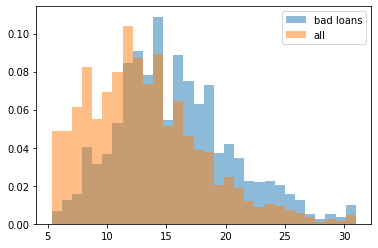

In [11]:
plt.hist(bad_loan['int_rate'], bins=30, label='bad loans', alpha=.5, density=True)
plt.hist(accept['int_rate'], bins=30, label='all', alpha=.5, density=True)
plt.legend(loc=1)
plt.show()

### What are the purposes and their proportions in the total loans and in bad loans

In [7]:
(accept['purpose'].value_counts()/accept.shape[0]*100).round(3)

debt_consolidation    56.526
credit_card           22.868
home_improvement       6.655
other                  6.168
major_purchase         2.231
medical                1.216
small_business         1.092
car                    1.062
vacation               0.687
moving                 0.681
house                  0.625
wedding                0.104
renewable_energy       0.064
educational            0.019
Name: purpose, dtype: float64

In [8]:
(bad_loan['purpose'].value_counts()/bad_loan.shape[0]*100).round(3)

debt_consolidation    61.378
credit_card           18.584
other                  6.129
home_improvement       5.783
major_purchase         2.041
small_business         1.727
medical                1.266
moving                 0.828
car                    0.801
vacation               0.647
house                  0.594
wedding                0.108
renewable_energy       0.082
educational            0.033
Name: purpose, dtype: float64

### Grade per purpose

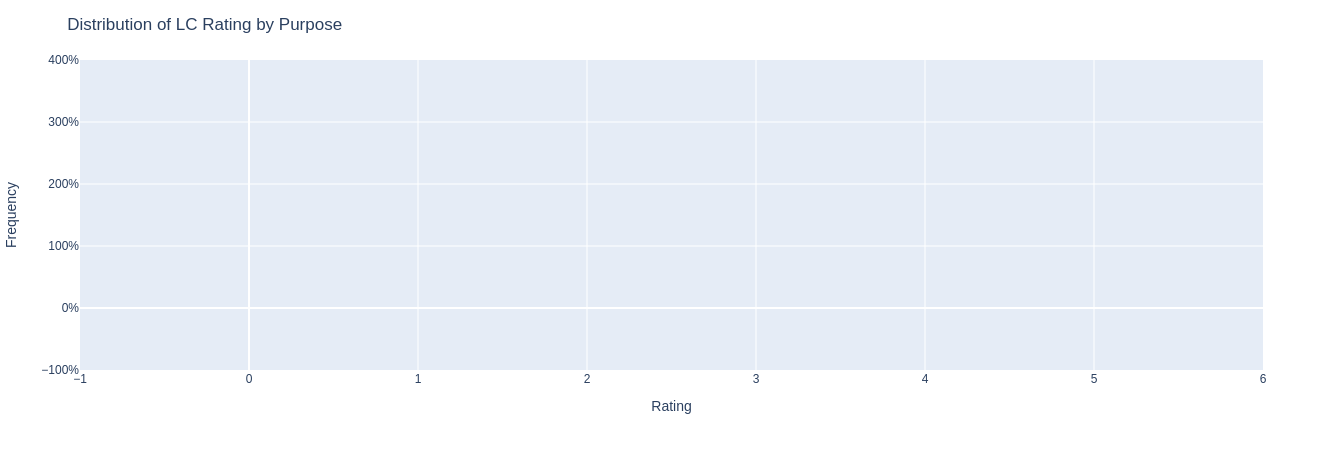

In [31]:
rating_by_purpose = accept.groupby(['purpose', 'sub_grade'])['id'].count()  # or use grade for less graularity
rating_by_purpose = rating_by_purpose.unstack().T
rating_by_purpose = rating_by_purpose / rating_by_purpose.sum()

fig1 = px.line(rating_by_purpose)
fig1.update_layout(title='Distribution of LC Rating by Purpose',
                   xaxis_title='Rating',
                   yaxis_title='Frequency',
                   yaxis_tickformat = ',.0%')
fig1.show()
# educational and credit cards (the biggest segment) are higher rated; 
# small business, moving and vacation are at the lower end